In [1]:
# Step 1: Classification with SVM, Naïve Bayes, and KNN
#-KNN
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras

In [16]:
#displaying the data from the file
df = pd.read_csv('Iris1.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
#Convert object into label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
77,78,6.7,3.0,5.0,1.7,1
26,27,5.0,3.4,1.6,0.4,0
104,105,6.5,3.0,5.8,2.2,2
123,124,6.3,2.7,4.9,1.8,2
34,35,4.9,3.1,1.5,0.1,0
149,150,5.9,3.0,5.1,1.8,2
93,94,5.0,2.3,3.3,1.0,1
92,93,5.8,2.6,4.0,1.2,1
71,72,6.1,2.8,4.0,1.3,1
16,17,5.4,3.9,1.3,0.4,0


In [21]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
# Extract features (x) and target variable (y)
x = df.drop(columns=['Id','Species'])
y = df['Species']
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
x_train.shape

(105, 4)

In [11]:
# Standardize the features using Standard Scaler, we apply feature scaling because it imporves the training performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
68            6.2           2.2            4.5           1.5
[[ 0.35083968 -1.91106337  0.35232333  0.32130952]]


In [25]:
# Create a K-Nearest Neighbors (KNN) classifier
# KNeighborsClassifier is a simple and effective classification algorithm
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# Train the classifier on the training data
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
# Make a prediction on a new data point [5,2,3.5,0.2]
print(classifier.predict(sc.transform([[5,2,3.5,0.2]])))

[0]


c:\Users\mdele\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\mdele\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [27]:
# Make predictions on the test set
y_pred = classifier.predict(x_test)
#The purpose of this concatenation might be to compare the predicted values (y_pred) against the actual values (y_test).
#By placing them side by side in the concatenated array, you can visually inspect how close the predictions are to the actual values for analysis or evaluation purposes.
# Reshape is used to concatenate along the columns
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


In [28]:
# Evaluate the performance of the classifier using confusion matrix and Calculating the accuracy of the classifier
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
#The diagonal elements (from top-left to bottom-right) represent the number of correct predictions (true positives) for each class.

[[10  0  0]
 [ 0 15  2]
 [ 0  1 17]]
0.9333333333333333


In [29]:
import seaborn as sns

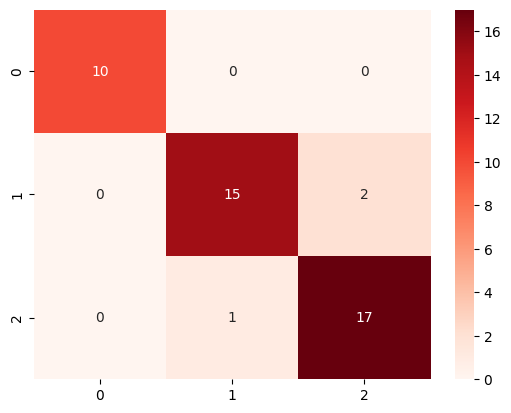

In [30]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')

In [31]:
#-SVM
#Support Vector Machine (SVM) is a supervised machine learning algorithm,
#used for classification and regression tasks, aiming to find the hyperplane that maximally separates different classes in the feature space.
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state =0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [32]:
# Make a prediction on a new data point [5,2,3.5,0.2]
print(classifier.predict(sc.transform([[5,2,3.5,0.2]])))

[0]


c:\Users\mdele\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\mdele\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [33]:
# Make predictions on the test set
y_pred = classifier.predict(x_test)
#The purpose of this concatenation might be to compare the predicted values (y_pred) against the actual values (y_test).
#By placing them side by side in the concatenated array, you can visually inspect how close the predictions are to the actual values for analysis or evaluation purposes.
# Reshape is used to concatenate along the columns
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


In [34]:
# Evaluate the performance of the classifier using confusion matrix and Calculating the accuracy of the classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[10  0  0]
 [ 0 15  2]
 [ 0  0 18]]
0.9555555555555556


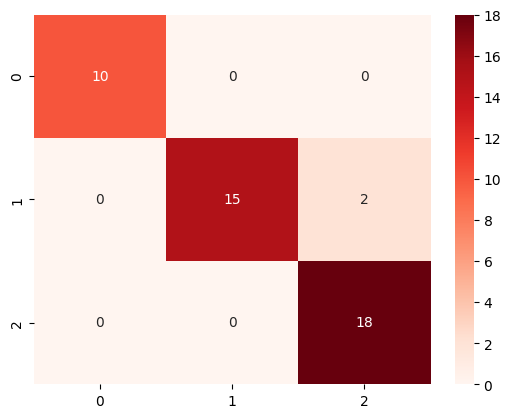

In [35]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')

In [36]:
#-Naïve Bayes
#Naïve Bayes is a probabilistic machine learning algorithm
#that relies on the assumption of independence among features to efficiently classify or predict outcomes based on training data.
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [37]:
# Make a prediction on a new data point [5,2,3.5,0.2]
print(classifier.predict(sc.transform([[5,2,3.5,0.2]])))

[2]


c:\Users\mdele\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\mdele\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [38]:
# Make predictions on the test set
y_pred = classifier.predict(x_test)
#The purpose of this concatenation might be to compare the predicted values (y_pred) against the actual values (y_test).
#By placing them side by side in the concatenated array, you can visually inspect how close the predictions are to the actual values for analysis or evaluation purposes.
# Reshape is used to concatenate along the columns
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 1]
 [0 0]]


In [39]:
# Evaluate the performance of the classifier using confusion matrix and Calculating the accuracy of the classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[10  0  0]
 [ 0 14  3]
 [ 0  0 18]]
0.9333333333333333


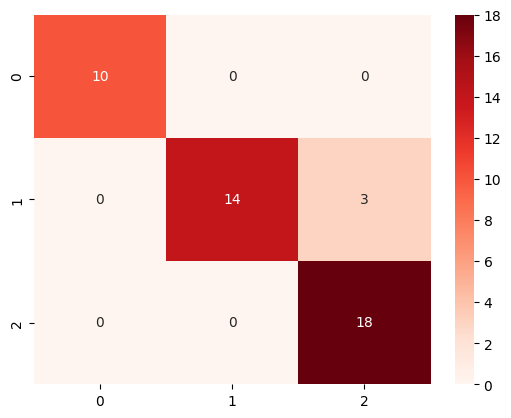

In [40]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')

In [43]:
# Step 2: Replace some values with NaN
df = pd.read_csv('Iris1.csv')
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,11,5.4,3.7,1.5,0.2,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa


In [44]:
# Specify the values to be replaced with NaN
values_to_replace =[5.1 , 3.2 , 1.3 ,0.2 ]

# Replace the values with NaN
df['SepalLengthCm'] = df['SepalLengthCm'].replace(values_to_replace,np.nan)
df['SepalWidthCm'] = df['SepalWidthCm'].replace(values_to_replace,np.nan)
df['PetalLengthCm'] = df['PetalLengthCm'].replace(values_to_replace,np.nan)
df['PetalWidthCm'] = df['PetalWidthCm'].replace(values_to_replace,np.nan)

# Display the updated dataset
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            NaN           3.5            1.4           NaN   
1      2            4.9           3.0            1.4           NaN   
2      3            4.7           NaN            NaN           NaN   
3      4            4.6           3.1            1.5           NaN   
4      5            5.0           3.6            1.4           NaN   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            NaN           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [61]:
#Convert object into label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.500000,5.000000,1.900000,2
110,111,6.5,3.040146,3.806667,2.000000,2
40,41,5.0,3.500000,3.806667,0.300000,0
84,85,5.4,3.000000,4.500000,1.500000,1
73,74,6.1,2.800000,4.700000,1.200000,1
103,104,6.3,2.900000,5.600000,1.800000,2
50,51,7.0,3.040146,4.700000,1.400000,1
102,103,7.1,3.000000,5.900000,2.100000,2
10,11,5.4,3.700000,1.500000,1.443119,0
90,91,5.5,2.600000,4.400000,1.200000,1


In [63]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
# Step 3: Replace NaN values with the mean of the corresponding column

df['SepalLengthCm'] = df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean())
df['SepalWidthCm'] = df['SepalWidthCm'].fillna(df['SepalWidthCm'].mean())
df['PetalLengthCm'] = df['PetalLengthCm'].fillna(df['PetalLengthCm'].mean())
df['PetalWidthCm'] = df['PetalWidthCm'].fillna(df['PetalWidthCm'].mean())

In [65]:
# Extract features (x) and target variable (y)
x = df.drop(columns=['Id','Species'])
y = df['Species']
x.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.89078,3.500000,1.400000,1.443119
1,4.90000,3.000000,1.400000,1.443119
2,4.70000,3.040146,3.806667,1.443119
3,4.60000,3.100000,1.500000,1.443119
4,5.00000,3.600000,1.400000,1.443119
5,5.40000,3.900000,1.700000,0.400000
6,4.60000,3.400000,1.400000,0.300000
7,5.00000,3.400000,1.500000,1.443119
8,4.40000,2.900000,1.400000,1.443119
9,4.90000,3.100000,1.500000,0.100000


In [66]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [67]:
x_train.shape

(105, 4)

In [68]:
# Standardize the features using Standard Scaler, we apply feature scaling because it imporves the training performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train[:1])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
146            6.3           2.5            5.0           1.9
[[ 0.54440492 -1.22957115  0.73392059  0.77757267]]


In [69]:
# Create a K-Nearest Neighbors (KNN) classifier
# KNeighborsClassifier is a simple and effective classification algorithm
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# Train the classifier on the training data
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [70]:
# Make a prediction on a new data point [5,2,3.5,0.2]
print(classifier.predict(sc.transform([[5,2,3.5,0.2]])))

[1]


c:\Users\mdele\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
# Make predictions on the test set
y_pred = classifier.predict(x_test)
#The purpose of this concatenation might be to compare the predicted values (y_pred) against the actual values (y_test).
#By placing them side by side in the concatenated array, you can visually inspect how close the predictions are to the actual values for analysis or evaluation purposes.
# Reshape is used to concatenate along the columns
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[2 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


In [72]:
# Evaluate the performance of the classifier using confusion matrix and Calculating the accuracy of the classifier
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
#The diagonal elements (from top-left to bottom-right) represent the number of correct predictions (true positives) for each class.

[[15  2  0]
 [ 0 13  1]
 [ 0  2 12]]
0.8888888888888888


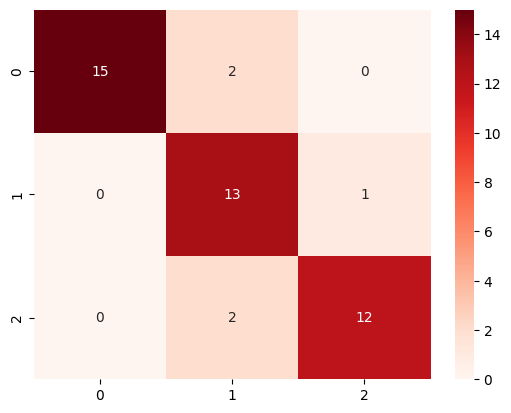

In [73]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')

In [74]:
#-SVM
#Support Vector Machine (SVM) is a supervised machine learning algorithm,
#used for classification and regression tasks, aiming to find the hyperplane that maximally separates different classes in the feature space.
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state =0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [75]:
# Make a prediction on a new data point [5,2,3.5,0.2]
print(classifier.predict(sc.transform([[5,2,3.5,0.2]])))

[1]


c:\Users\mdele\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
# Make predictions on the test set
y_pred = classifier.predict(x_test)
#The purpose of this concatenation might be to compare the predicted values (y_pred) against the actual values (y_test).
#By placing them side by side in the concatenated array, you can visually inspect how close the predictions are to the actual values for analysis or evaluation purposes.
# Reshape is used to concatenate along the columns
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


In [77]:
# Evaluate the performance of the classifier using confusion matrix and Calculating the accuracy of the classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]
0.9555555555555556


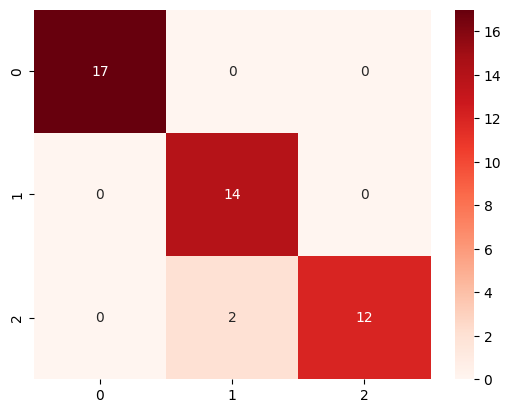

In [78]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')

In [79]:
#-Naïve Bayes
#Naïve Bayes is a probabilistic machine learning algorithm
#that relies on the assumption of independence among features to efficiently classify or predict outcomes based on training data.
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [80]:
# Make predictions on the test set
y_pred = classifier.predict(x_test)
#The purpose of this concatenation might be to compare the predicted values (y_pred) against the actual values (y_test).
#By placing them side by side in the concatenated array, you can visually inspect how close the predictions are to the actual values for analysis or evaluation purposes.
# Reshape is used to concatenate along the columns
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


In [81]:
# Evaluate the performance of the classifier using confusion matrix and Calculating the accuracy of the classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[15  2  0]
 [ 0 14  0]
 [ 0  2 12]]
0.9111111111111111


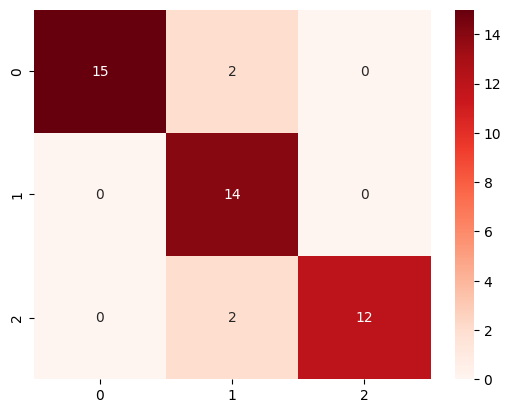

In [82]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')